<a href="https://colab.research.google.com/github/AT200210/Data_Science/blob/main/DL/Heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
alexteboul_heart_disease_health_indicators_dataset_path = kagglehub.dataset_download('alexteboul/heart-disease-health-indicators-dataset')

print('Data source import complete.')


In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/heart-disease-health-indicators-dataset/heart_disease_health_indicators_BRFSS2015.csv


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from keras.layers import Input, Dense, Flatten, Conv1D, MaxPooling1D
from keras.models import Model, Sequential

In [ ]:
data=pd.read_csv("/kaggle/input/heart-disease-health-indicators-dataset/heart_disease_health_indicators_BRFSS2015.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
data['HeartDiseaseorAttack'].value_counts()

HeartDiseaseorAttack
0.0    229787
1.0     23893
Name: count, dtype: int64

<Axes: xlabel='Smoker', ylabel='count'>

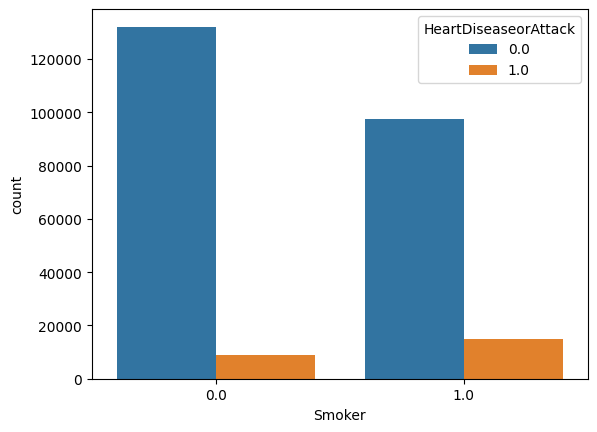

In [ ]:
sns.countplot(x='Smoker',hue='HeartDiseaseorAttack', data=data)

In [ ]:
corr_matrix=data.corr().abs()
corr_matrix

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
HeartDiseaseorAttack,1.000000,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,0.180272,0.087299,0.019790,...,0.018734,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618,0.099600,0.141011
HighBP,0.209361,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.271596,0.125267,0.040555,...,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,0.141358,0.171235
HighChol,0.180765,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.209085,0.078046,0.040859,...,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,0.070802,0.085459
CholCheck,0.044206,0.098508,0.085642,1.000000,0.034495,0.009929,0.024158,0.067546,0.004190,0.023849,...,0.117626,0.058255,0.046589,0.008366,0.031775,0.040585,0.022115,0.090321,0.001510,0.014259
BMI,0.052904,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.224379,0.147294,0.087518,...,0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,0.036618,0.103932,0.100069
Smoker,0.114441,0.096991,0.091299,0.009929,0.013804,1.000000,0.061173,0.062914,0.087401,0.077666,...,0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,0.161955,0.123937
Stroke,0.203002,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.107179,0.069151,0.013389,...,0.008776,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974,0.076009,0.128599
Diabetes,0.180272,0.271596,0.209085,0.067546,0.224379,0.062914,0.107179,1.000000,0.121947,0.042192,...,0.015410,0.035436,0.302587,0.073507,0.176287,0.224239,0.031040,0.185026,0.130517,0.171483
PhysActivity,0.087299,0.125267,0.078046,0.004190,0.147294,0.087401,0.069151,0.121947,1.000000,0.142756,...,0.035505,0.061638,0.266186,0.125587,0.219230,0.253174,0.032482,0.092511,0.199658,0.198539
Fruits,0.019790,0.040555,0.040859,0.023849,0.087518,0.077666,0.013389,0.042192,0.142756,1.000000,...,0.031544,0.044243,0.103854,0.068217,0.044633,0.048352,0.091175,0.064547,0.110187,0.079929


<Axes: >

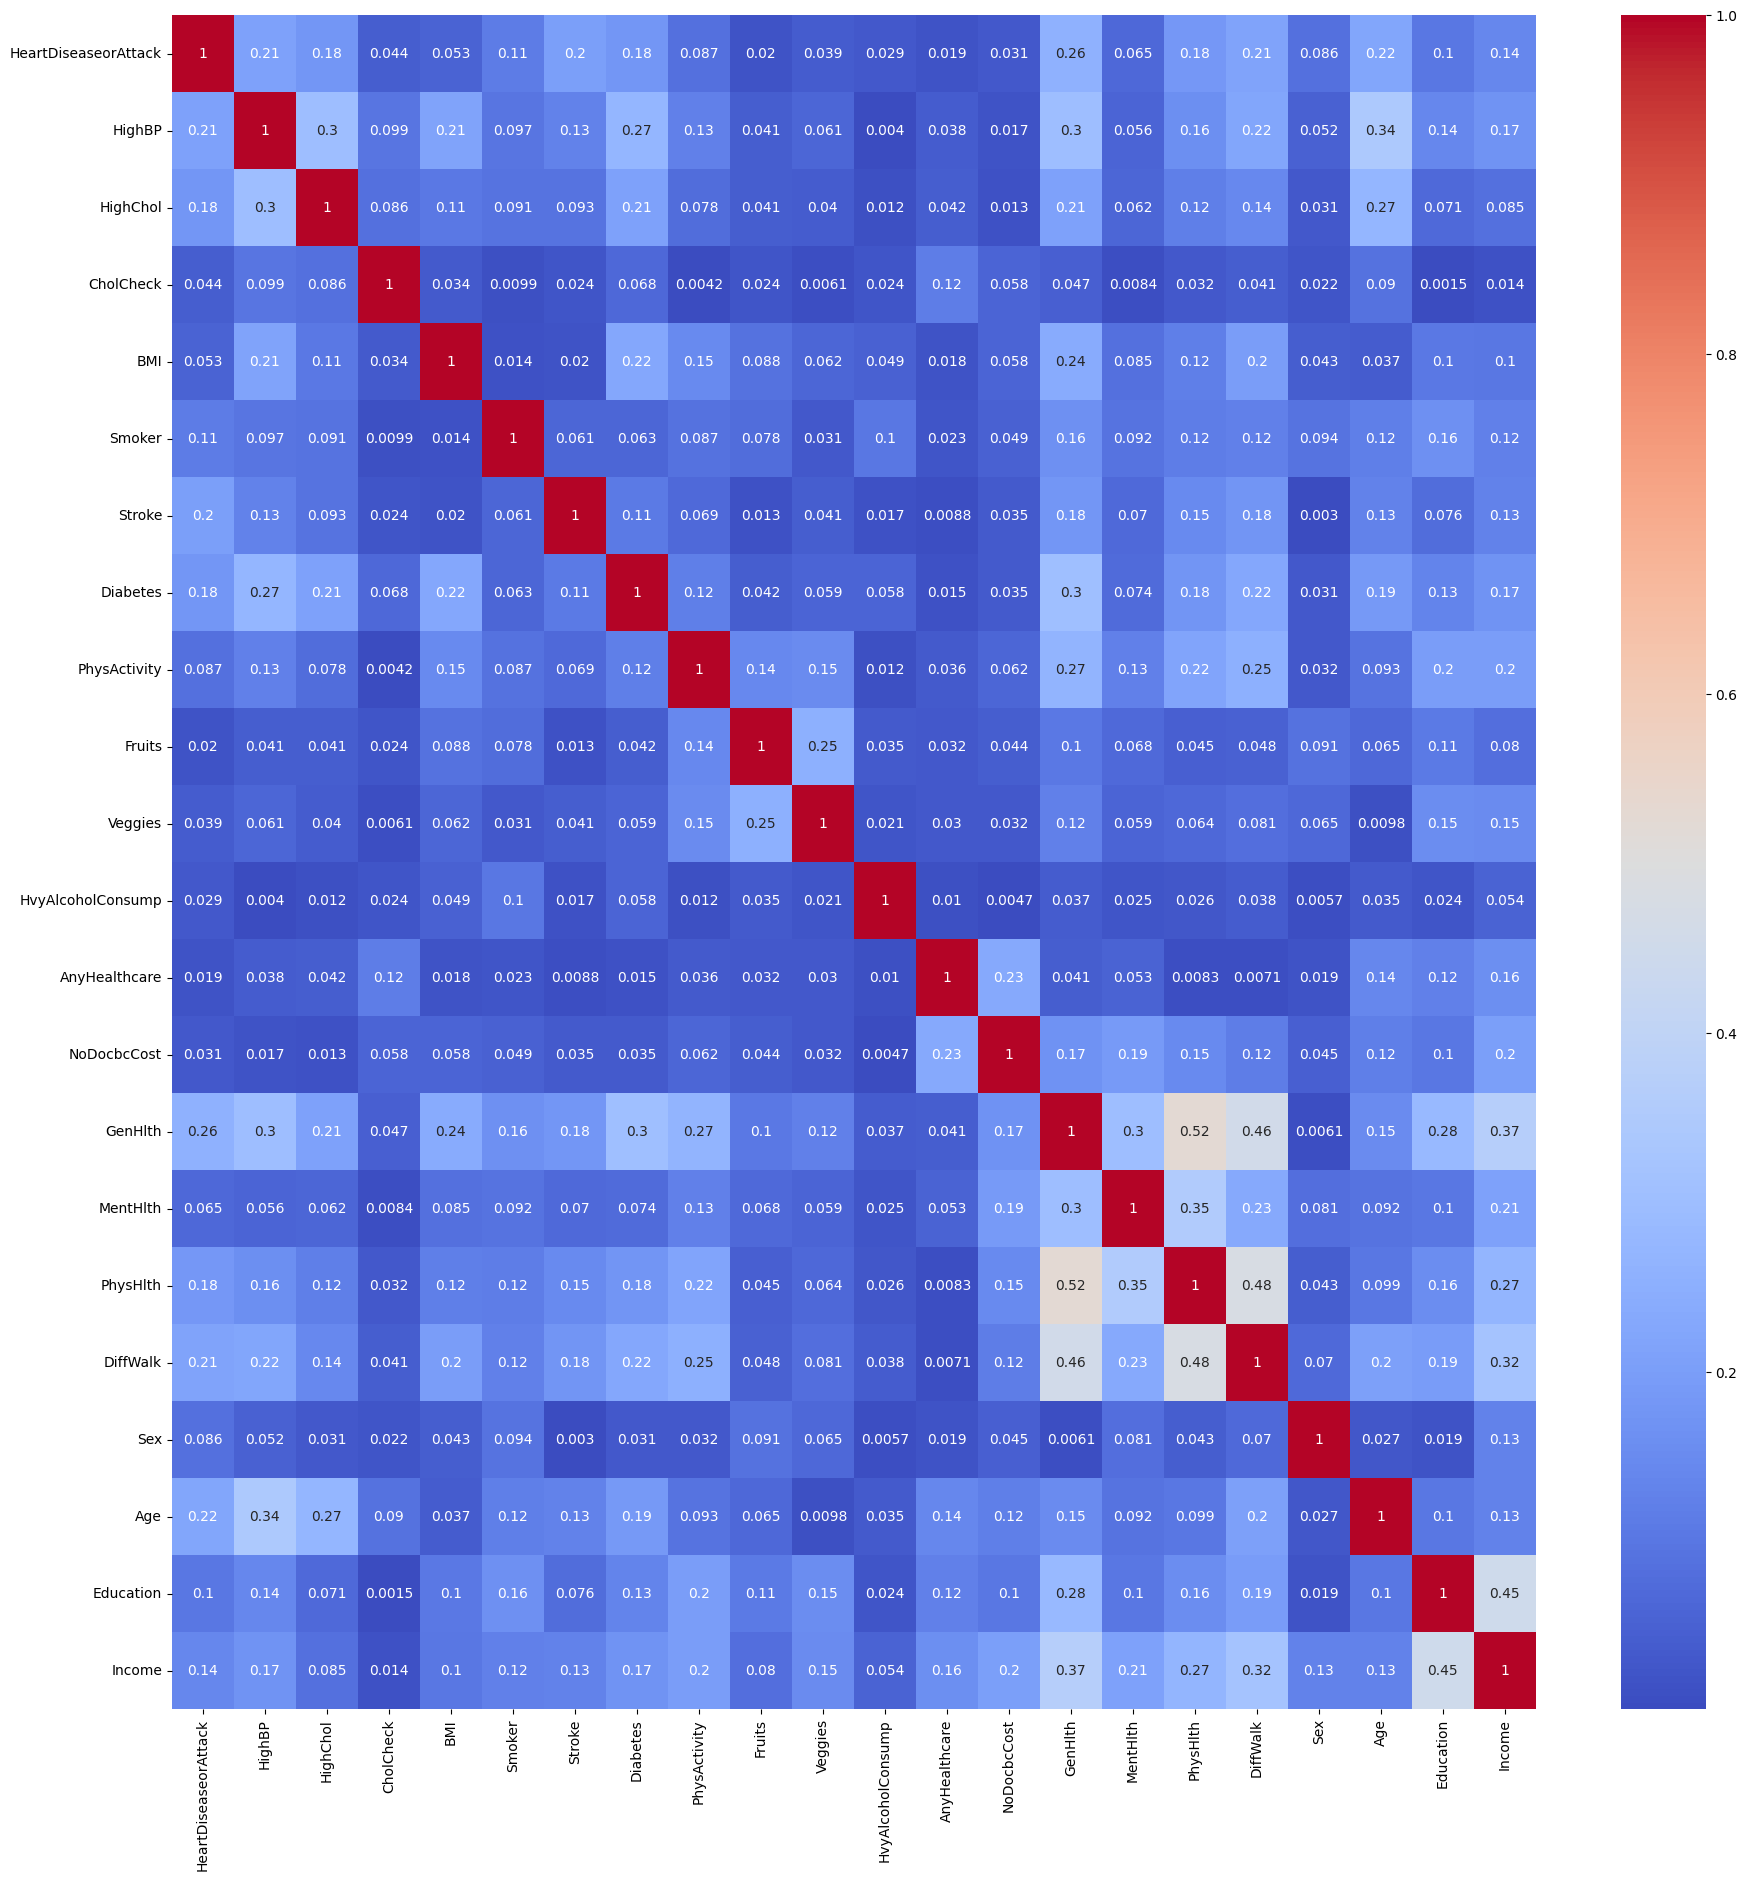

In [ ]:
plt.figure(figsize=(22,22))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')

In [ ]:
upper_tri=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))


In [ ]:
to_drop=[column for column in upper_tri.columns if any(upper_tri[column]>0.7) or any(upper_tri[column]<0.01)]
to_drop

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)


['Smoker',
 'PhysActivity',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Sex',
 'Age',
 'Education']

In [ ]:
target=data['HeartDiseaseorAttack']
features=data.drop(to_drop, axis=1)
features=features.drop('HeartDiseaseorAttack',axis=1)
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   HighBP     253680 non-null  float64
 1   HighChol   253680 non-null  float64
 2   CholCheck  253680 non-null  float64
 3   BMI        253680 non-null  float64
 4   Stroke     253680 non-null  float64
 5   Diabetes   253680 non-null  float64
 6   Fruits     253680 non-null  float64
 7   GenHlth    253680 non-null  float64
 8   Income     253680 non-null  float64
dtypes: float64(9)
memory usage: 17.4 MB


In [ ]:
scaler=MinMaxScaler()
scaled_features=scaler.fit_transform(features)

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(scaled_features,target,test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94     45968
         1.0       0.35      0.12      0.18      4768

    accuracy                           0.90     50736
   macro avg       0.63      0.55      0.56     50736
weighted avg       0.86      0.90      0.87     50736



In [ ]:
from xgboost import XGBClassifier
xg=XGBClassifier()
xg.fit(X_train, y_train)
y_pred=xg.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     45968
         1.0       0.53      0.06      0.11      4768

    accuracy                           0.91     50736
   macro avg       0.72      0.53      0.53     50736
weighted avg       0.87      0.91      0.87     50736



In [ ]:
X_train_2d=np.expand_dims(X_train,axis=2)
n_timesteps, n_features=X_train_2d.shape[1], X_train_2d.shape[2]

model=Sequential()
model.add(Conv1D(filters=8, kernel_size=2, activation='relu',input_shape=(n_timesteps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(16,activation="relu"))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)                    │ (None, 8, 8)                │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 4, 8)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 569 (2.22 KB)

 Trainable params: 569 (2.22 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
history=model.fit(X_train_2d, y_train, validation_split=0.2,shuffle=True,epochs=15,batch_size=64,verbose=1)

Epoch 1/15


I0000 00:00:1748064307.816970     123 service.cc:148] XLA service 0x7b99d400b900 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1748064307.817455     123 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1748064308.063349     123 cuda_dnn.cc:529] Loaded cuDNN version 90300


  68/2537 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9007 - loss: 0.5010

I0000 00:00:1748064309.168332     123 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2537/2537 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9056 - loss: 0.3020 - val_accuracy: 0.9054 - val_loss: 0.2653
Epoch 2/15
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9062 - loss: 0.2620 - val_accuracy: 0.9062 - val_loss: 0.2620
Epoch 3/15
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9069 - loss: 0.2593 - val_accuracy: 0.9063 - val_loss: 0.2590
Epoch 4/15
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9067 - loss: 0.2570 - val_accuracy: 0.9065 - val_loss: 0.2595
Epoch 5/15
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9068 - loss: 0.2568 - val_accuracy: 0.9061 - val_loss: 0.2590
Epoch 6/15
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9064 - loss: 0.2577 - val_accuracy: 0.9063 - val_loss: 0.2589
Epoch 7/15
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9063 - loss: 0.2573 - val_accuracy: 0.9063 - val_loss: 0.2581
Epoch 8/15
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9072 - loss: 0.2557 - val_accura

In [ ]:
pip install opencv-python